In [29]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [30]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [31]:
X_train[0].shape

(28, 28)

In [32]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

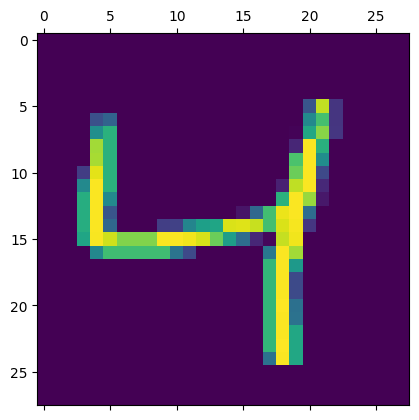

In [33]:
plt.matshow(X_train[2])

In [34]:
y_train[2]

4

In [35]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [36]:
X_train=X_train/255
X_test=X_test/255

In [37]:
flattend_X_train = X_train.reshape(len(X_train),28*28)
flattend_X_test = X_test.reshape(len(X_test),28*28)

In [38]:
model= keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(flattend_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4628 - accuracy: 0.8799
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9144
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2666 - accuracy: 0.9255


In [39]:
model.evaluate(flattend_X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.9259


[0.2706969380378723, 0.9258999824523926]

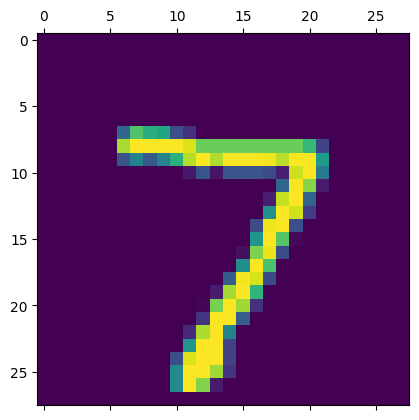

In [41]:
plt.matshow(X_test[0])

In [42]:
y_predicted=model.predict(flattend_X_test)
y_predicted[0]

313/313 [==============================] - 0s 920us/step


array([2.1620389e-02, 3.4461510e-07, 4.5442257e-02, 9.4825381e-01,
       2.3347994e-03, 1.2762238e-01, 2.1978276e-06, 9.9984592e-01,
       8.1826039e-02, 5.6319493e-01], dtype=float32)

In [43]:
np.argmax(y_predicted[0])

7

In [44]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(95.72222222222221, 0.5, 'Truth')

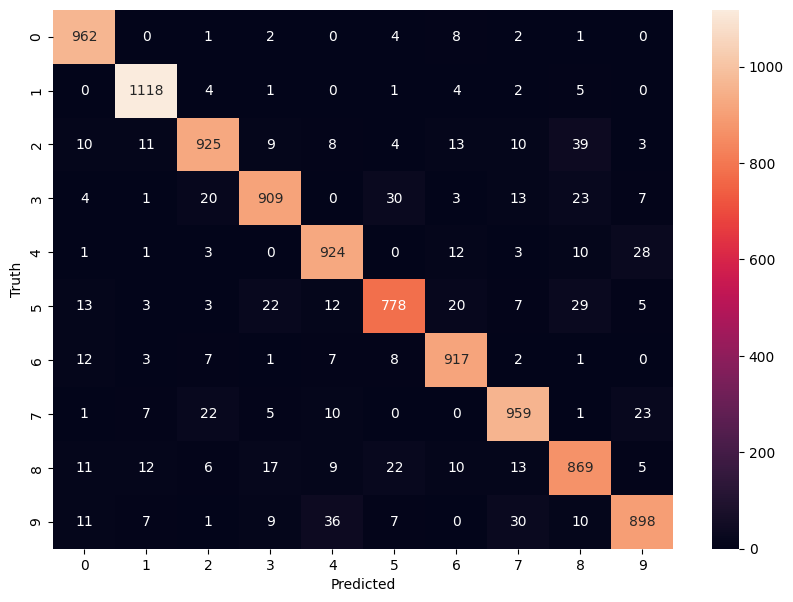

In [48]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
model= keras.Sequential([
    keras.layers.Dense(128,input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(flattend_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2625 - accuracy: 0.9265
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1170 - accuracy: 0.9654
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0793 - accuracy: 0.9761
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0608 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0467 - accuracy: 0.9851


In [54]:
model.evaluate(flattend_X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0770 - accuracy: 0.9758


[0.07696027308702469, 0.9757999777793884]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

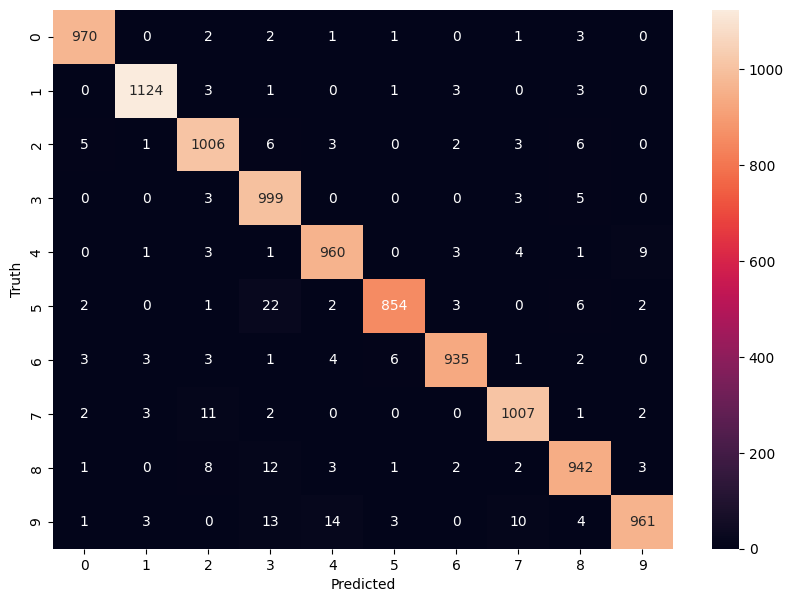

In [56]:
y_predicted=model.predict(flattend_X_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')